In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib as mpl
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
df = pd.read_pickle("../../data/interim/03_data_features.pkl")

In [ ]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:10:11.200,0.019849,0.943488,-0.126538,8.091406,-6.211029,-7.679072,A,bench,heavy,1,...,0.287944,202.822554,-18.080088,-39.165310,-7.919667,13.483224,-12.616286,3.882138,-13.576565,2
2019-01-11 15:10:11.600,-0.065857,0.820942,-0.190766,14.998780,-3.643409,-12.384990,A,bench,heavy,1,...,0.169451,233.061285,15.242419,12.723101,3.048430,-28.045063,15.782696,-9.309680,-7.107568,2
2019-01-11 15:10:12.000,-0.111955,1.045320,-0.197446,-5.018645,-15.340902,7.282644,A,bench,heavy,1,...,0.167934,229.275973,6.303422,9.326020,-17.456007,27.756495,-11.187811,-13.902975,-1.853804,2
2019-01-11 15:10:12.400,-0.137639,1.145860,-0.163199,3.076573,8.881287,-14.895980,A,bench,heavy,1,...,0.173067,221.137388,-8.966594,-11.751874,32.586399,-18.164562,-0.268167,-0.913141,-2.290648,2
2019-01-11 15:10:12.800,-0.199548,0.893178,-0.231650,0.315477,-0.691507,3.056196,A,bench,heavy,1,...,0.315338,217.772132,-14.589412,-5.326877,-34.707269,10.478145,19.460596,27.708137,16.346187,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-16 19:14:21.800,-0.002970,0.483633,0.905722,12.888497,-3.181767,9.316152,E,squat,heavy,93,...,0.129534,177.435480,14.725326,-10.836444,-4.182843,-13.328865,-1.344794,7.245765,7.694262,0
2019-01-16 19:14:22.200,0.025586,0.608814,0.886018,12.885858,8.033918,13.097638,E,squat,heavy,93,...,0.275991,198.781531,43.969903,5.340512,-6.420944,8.579796,8.429851,-19.245821,1.976584,0
2019-01-16 19:14:22.600,0.022462,0.460622,0.659979,-5.696209,2.662169,5.220264,E,squat,heavy,93,...,0.088347,180.740710,9.081956,-14.043063,4.651999,-1.544547,2.074938,-7.082485,8.533442,0


In [ ]:
df_train = df.drop(columns=["participant", "category", "set"], axis=1)

In [ ]:
X = df_train.drop("label", axis=1)
y = df_train["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [ ]:
X_train

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,duration,pca_1,pca_2,pca_3,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-18 17:30:52.200,-0.000620,-1.188833,-0.030809,-19.930470,3.055933,11.685698,21.0,0.421765,-0.128960,-0.066633,...,0.282593,186.702064,-20.050051,14.351689,-17.154535,-29.120305,0.357785,-10.097487,-8.175087,3
2019-01-15 19:37:35.000,0.014907,-1.260824,-0.105566,0.152273,2.187501,-3.780568,29.0,0.446248,-0.172706,-0.031550,...,0.555628,317.005530,-98.410553,31.142794,-78.025135,4.775967,15.021447,-11.728417,3.848710,3
2019-01-18 17:22:37.800,0.953207,-0.301137,-0.035080,0.812656,-12.224794,0.142482,33.0,0.202217,0.064944,0.428226,...,0.962732,364.172734,-99.333599,-111.614648,133.692165,-53.742778,-54.469463,2.234105,32.473462,4
2019-01-15 19:37:42.200,0.072873,-0.863691,0.321841,-44.492428,0.878213,3.963124,29.0,0.325620,0.101509,-0.111236,...,0.515265,334.620316,49.742377,101.324290,63.600194,1.061055,10.821655,-2.638936,-0.126919,1
2019-01-20 17:33:21.400,-0.049900,-0.925859,-0.049130,-0.729194,-5.594341,2.783229,19.0,0.327807,-0.139620,-0.058000,...,0.262135,300.337623,-18.456971,-0.183961,-52.855009,33.143728,7.387100,13.209566,19.107574,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 15:49:09.200,-0.369944,1.208121,-0.093297,7.922691,3.424650,11.795017,21.0,-0.428283,-0.147442,-0.080062,...,0.441402,459.560479,61.160197,-37.871857,47.262232,-30.054279,48.852951,82.144106,47.026548,2
2019-01-19 17:31:08.200,-0.051582,-1.301046,-0.090440,18.339324,-10.050750,-10.176086,21.0,0.454953,-0.177346,-0.054683,...,0.570635,204.822526,-50.990666,9.481198,-8.291557,39.960359,-42.109045,-4.325137,-17.445285,3
2019-01-15 19:28:23.200,0.036666,-0.766149,0.088752,59.634264,-5.326681,-3.949550,32.0,0.285710,-0.038867,-0.000798,...,0.565593,298.429751,132.209931,17.636356,-31.153938,-19.243495,-20.278236,-12.086495,0.313863,1


In [ ]:
X_test

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,duration,pca_1,pca_2,pca_3,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-14 13:32:19.000,-0.212291,0.902806,-0.090862,-11.010005,9.414659,28.445437,14.0,-0.310907,-0.128685,-0.038660,...,0.557515,291.662504,29.633101,96.019115,13.443034,48.306897,-5.545353,5.039885,-37.021381,2
2019-01-14 13:57:35.400,-0.118855,0.966334,0.126850,1.863591,-0.960993,-4.906219,18.0,-0.318676,0.016686,-0.029863,...,0.324052,516.188578,-73.806873,-7.406313,-44.060336,81.563690,-14.070521,42.535867,38.431870,2
2019-01-15 19:35:33.400,0.110704,-1.059868,-0.157034,-1.828386,0.932102,0.240135,16.0,0.384705,-0.179175,0.032071,...,0.414613,255.312375,-84.960448,5.246786,27.027717,4.149762,-11.905824,13.844022,3.833646,3
2019-01-18 17:26:12.800,0.294241,-0.935459,0.485678,-15.369007,29.444129,18.630327,39.0,0.374128,0.234061,-0.032921,...,0.316020,895.948363,-113.226496,144.319971,4.415027,68.781103,17.789117,-4.673718,121.555389,1
2019-01-15 19:06:45.400,0.506808,0.631773,0.607231,7.347349,-5.869687,-2.092113,16.0,-0.138192,0.395135,0.133154,...,0.226377,154.875862,-18.609460,23.851898,3.740056,0.121498,9.878593,6.452928,-2.981904,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-16 19:26:44.000,0.121862,-1.072582,-0.233069,-16.571290,-2.241468,-4.446728,26.0,0.387761,-0.222122,0.044276,...,0.247512,286.904966,1.080875,28.940860,-0.703647,-12.047843,52.630805,22.055855,6.989077,3
2019-01-14 13:57:33.400,-0.116862,1.031467,0.277355,-21.560404,-7.827747,29.260838,18.0,-0.337531,0.107436,-0.078609,...,0.203656,577.831878,113.928859,-16.491955,-18.263675,-11.979822,21.665158,-22.700821,-15.954210,2
2019-01-18 17:03:56.800,0.052312,0.651987,0.531494,22.169659,-0.429306,2.917725,16.0,-0.186059,0.272279,-0.046236,...,0.484809,171.871604,31.828696,58.036698,7.916077,9.004388,-2.114711,-0.341330,-1.453207,0


In [ ]:
y_train

epoch (ms)
2019-01-18 17:30:52.200     row
2019-01-15 19:37:35.000    dead
2019-01-18 17:22:37.800    rest
2019-01-15 19:37:42.200    dead
2019-01-20 17:33:21.400     row
                           ... 
2019-01-11 15:49:09.200     ohp
2019-01-19 17:31:08.200     row
2019-01-15 19:28:23.200    dead
2019-01-12 16:24:55.200    dead
2019-01-15 19:30:56.400    dead
Name: label, Length: 2901, dtype: object

In [ ]:
y_test

epoch (ms)
2019-01-14 13:32:19.000    bench
2019-01-14 13:57:35.400      ohp
2019-01-15 19:35:33.400     dead
2019-01-18 17:26:12.800     rest
2019-01-15 19:06:45.400    squat
                           ...  
2019-01-16 19:26:44.000     dead
2019-01-14 13:57:33.400      ohp
2019-01-18 17:03:56.800    squat
2019-01-11 16:06:00.600    squat
2019-01-11 16:24:35.600     dead
Name: label, Length: 967, dtype: object

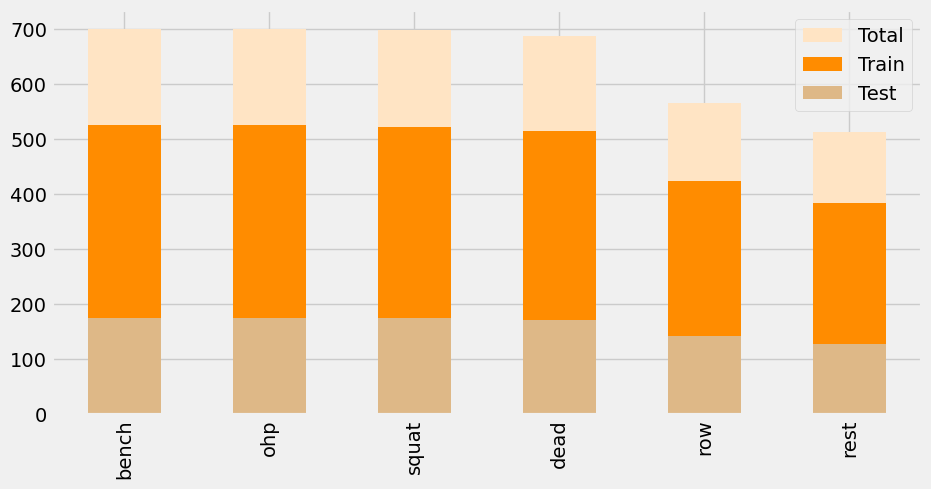

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(kind="bar", color="bisque", label="Total", ax=ax)
y_train.value_counts().plot(kind="bar", color="darkorange", label="Train", ax=ax)
y_test.value_counts().plot(kind="bar", color="burlywood", label="Test", ax=ax)
plt.legend()
plt.show()

In [ ]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "temp" in f]
freq_features = [f for f in df_train.columns if ("freq" in f) or ("pse" in f)]
cluster_features = ["cluster"]

In [ ]:
print(f"Basic features: {len(basic_features)}")
print(f"Square features: {len(square_features)}")
print(f"PCA features: {len(pca_features)}")
print(f"Time features: {len(time_features)}")
print(f"Frequency features: {len(freq_features)}")
print(f"Cluster features: {len(cluster_features)}")

Basic features: 6
Square features: 2
PCA features: 3
Time features: 16
Frequency features: 88
Cluster features: 1


In [ ]:
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(feature_set_1 + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

In [ ]:
learner = ClassificationAlgorithms()
max_features = 10

In [ ]:
selected_features = [
    "pca_1",
    "duration",
    "acc_z_freq_0.0_Hz_ws_14",
    "acc_x_freq_0.0_Hz_ws_14",
    "acc_r_temp_std_ws_5",
    "acc_x_freq_1.071_Hz_ws_14",
    "acc_y_freq_1.786_Hz_ws_14",
    "acc_r_freq_0.357_Hz_ws_14",
    "gyr_z_freq_weighted",
    "gyr_y_freq_1.429_Hz_ws_14",
]

ordered_features = [
    "pca_1",
    "duration",
    "acc_z_freq_0.0_Hz_ws_14",
    "acc_x_freq_0.0_Hz_ws_14",
    "acc_r_temp_std_ws_5",
    "acc_x_freq_1.071_Hz_ws_14",
    "acc_y_freq_1.786_Hz_ws_14",
    "acc_r_freq_0.357_Hz_ws_14",
    "gyr_z_freq_weighted",
    "gyr_y_freq_1.429_Hz_ws_14",
]

ordered_scores = [
    0.9031368493622889,
    0.9741468459152016,
    0.9972423302309549,
    0.9996552912788693,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
]

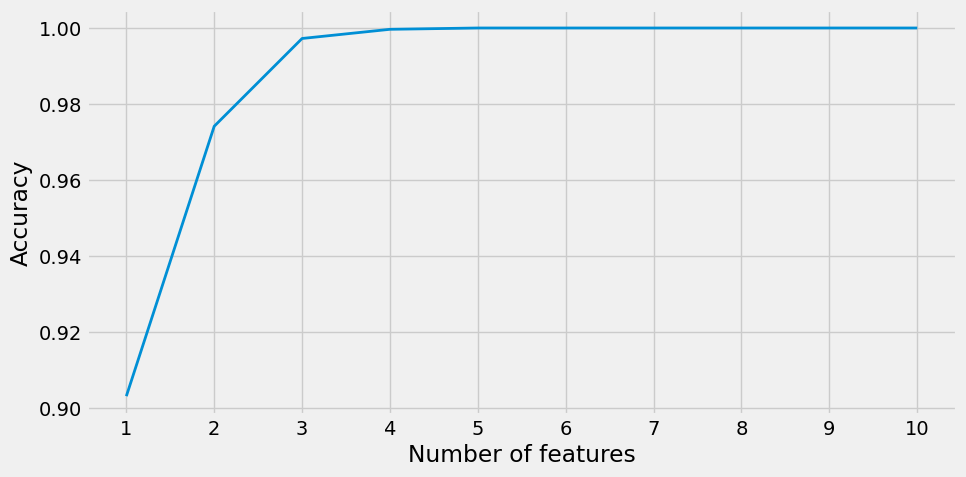

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1, 1), ordered_scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1, 1))
plt.show()

In [ ]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features,
]

feature_names = [
    "Feature set 1",
    "Feature set 2",
    "Feature set 3",
    "Feature set 4",
    "Selected features",
]

In [ ]:
iterations = 1
score_df = pd.DataFrame()

In [ ]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [ ]:
score_df.sort_values(by="accuracy", ascending=False)

,model,feature_set,accuracy
1,RF,Feature set 4,0.995863
3,DT,Selected features,0.994829
1,RF,Selected features,0.993795
3,DT,Feature set 4,0.992761
0,NN,Feature set 4,0.988625
0,NN,Selected features,0.986556
0,NN,Feature set 3,0.980352
1,RF,Feature set 3,0.980352
2,KNN,Feature set 4,0.964840
3,DT,Feature set 3,0.962771


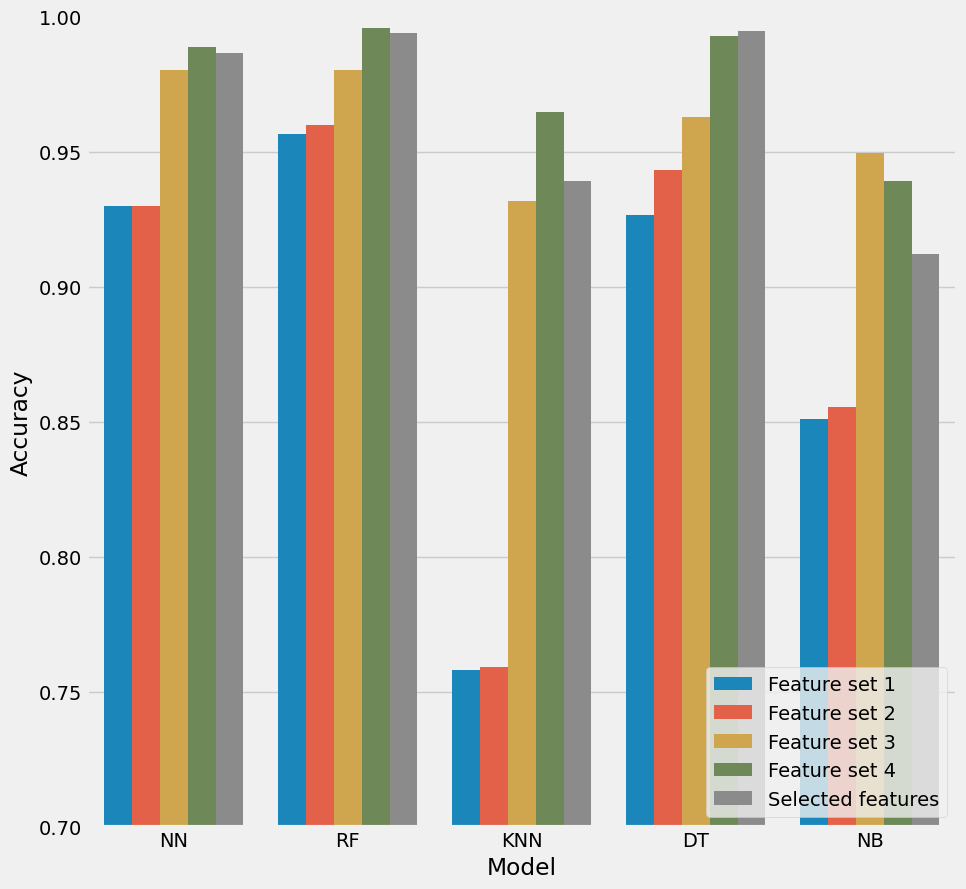

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.legend(loc="lower right")
plt.show()

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

In [ ]:
accuracy = accuracy_score(y_test, class_test_y)

In [ ]:
accuracy

0.9937952430196484

In [ ]:
classes = y_test.unique()

In [ ]:
classes

array(['bench', 'ohp', 'dead', 'rest', 'squat', 'row'], dtype=object)

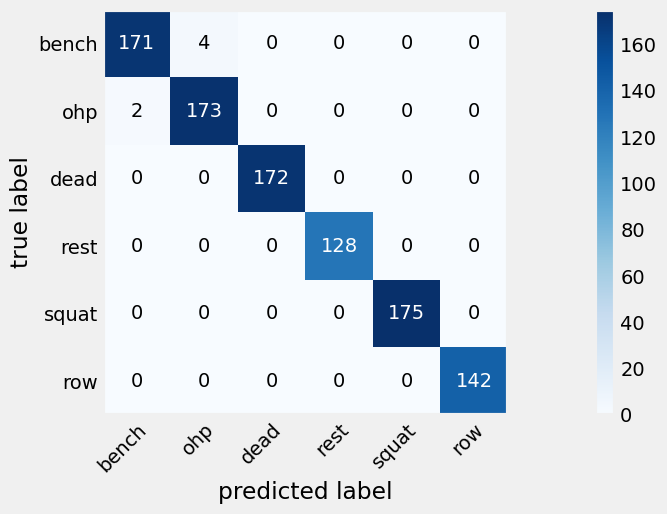

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=class_test_y, labels=classes)
fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=classes, colorbar=True)
plt.show()

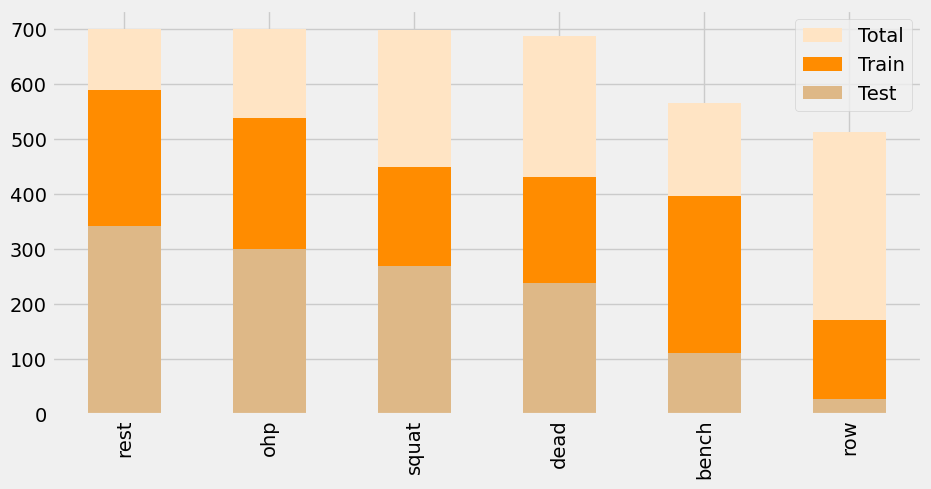

In [ ]:
participant_df = df.drop(columns=["category", "set"], axis=1)

X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis=1)
y_train = participant_df[participant_df["participant"] != "A"]["label"]

X_test = participant_df[participant_df["participant"] == "A"].drop("label", axis=1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]

X_train = X_train.drop("participant", axis=1)
X_test = X_test.drop("participant", axis=1)

fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(kind="bar", color="bisque", label="Total", ax=ax)
y_train.value_counts().plot(kind="bar", color="darkorange", label="Train", ax=ax)
y_test.value_counts().plot(kind="bar", color="burlywood", label="Test", ax=ax)
plt.legend()
plt.show()